In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
import pandas as pd

df = pd.read_csv("after_normalization_round.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 11 columns):
Index                   9964 non-null int64
City                    9964 non-null object
MarketHealthIndex       9964 non-null int64
SellForGain             9964 non-null float64
MoM                     9964 non-null float64
YoY                     9964 non-null float64
ForecastYoYPctChange    9964 non-null float64
NegativeEquity          9964 non-null float64
Delinquency             9964 non-null float64
DaysOnMarket            9964 non-null float64
Zri                     9964 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 817.4+ KB


In [46]:
df.head()

,Index,City,MarketHealthIndex,SellForGain,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,Zri
0,0,New York,8,0.9573,0.391177,0.516458,0.549638,0.116379,0.099894,0.491289,0.109584
1,1,Los Angeles,9,0.9637,0.429479,0.572632,0.594527,0.093381,0.031304,0.128920,0.143821
2,2,Chicago,1,0.8192,0.386944,0.462391,0.528597,0.392424,0.040973,0.306620,0.068041
3,3,Houston,7,0.8000,0.437753,0.532883,0.625732,0.162742,0.039081,0.222997,0.055721
4,4,Philadelphia,5,0.8760,0.432304,0.643848,0.638912,0.254035,0.074887,0.250871,0.042719


In [71]:
X = df.as_matrix(columns=['SellForGain','MoM','YoY','ForecastYoYPctChange','NegativeEquity','Delinquency','DaysOnMarket','Zri'])
Y = df.as_matrix(columns=['MarketHealthIndex'])

### 1. Decision Tree

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# predict Hoboken
clf.predict([[0.8889, 0.39601617, 0.551712509, 0.557066754, 0.210198521, 0.00130719, 0.254355401, 0.069465082]])

with open("tree_classifier_new.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f, max_depth=3, class_names=['0','1','2','3','4','5','6','7','8','9','10'])

array([6], dtype=int64)

In [56]:
# predict top 20 cities
X1 = X[0:20, :]
Y1 = Y[0:20, :]

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X1, Y1)

with open("tree_classifier_part.txt", "w") as f:
    f = tree.export_graphviz(clf1, out_file=f, class_names=['0','1','2','3','4','5','6','7','8','9','10'], node_ids=True)

             precision    recall  f1-score   support

          0       0.48      0.46      0.47       149
          1       0.40      0.39      0.39       298
          2       0.31      0.32      0.32       301
          3       0.23      0.25      0.24       300
          4       0.22      0.20      0.21       296
          5       0.20      0.18      0.19       300
          6       0.25      0.26      0.25       297
          7       0.23      0.25      0.24       302
          8       0.27      0.32      0.29       298
          9       0.39      0.33      0.36       300
         10       0.60      0.60      0.60       149

avg / total       0.30      0.30      0.30      2990

Accuracy: 0.302006688963


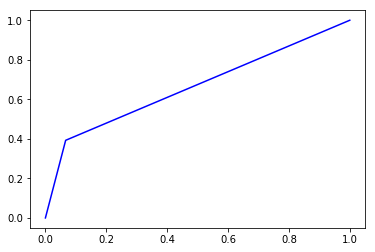

0.663062068071


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

cart = tree.DecisionTreeClassifier()
clf = cart.fit(X_train, y_train)
predicted = clf.predict(X_test)
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted)

print(classification_report(y_test, predicted))

print("Accuracy:", accuracy_score(y_test, predicted))


from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, cart.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr2,tpr2, color="blue")
plt.show()
print(metrics.auc(fpr2, tpr2))

### 2.Logistic Regression

In [87]:
import pandas as pd

df = pd.read_csv("after_normalization_binary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 11 columns):
Index                   9964 non-null int64
City                    9964 non-null object
MarketHealthIndex       9964 non-null int64
SellForGain             9964 non-null float64
MoM                     9964 non-null float64
YoY                     9964 non-null float64
ForecastYoYPctChange    9964 non-null float64
NegativeEquity          9964 non-null float64
Delinquency             9964 non-null float64
DaysOnMarket            9964 non-null float64
Zri                     9964 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 817.4+ KB


In [88]:
df.head()

,Index,City,MarketHealthIndex,SellForGain,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,Zri
0,0,New York,1,0.9573,0.391177,0.516458,0.549638,0.116379,0.099894,0.491289,0.109584
1,1,Los Angeles,1,0.9637,0.429479,0.572632,0.594527,0.093381,0.031304,0.128920,0.143821
2,2,Chicago,0,0.8192,0.386944,0.462391,0.528597,0.392424,0.040973,0.306620,0.068041
3,3,Houston,1,0.8000,0.437753,0.532883,0.625732,0.162742,0.039081,0.222997,0.055721
4,4,Philadelphia,0,0.8760,0.432304,0.643848,0.638912,0.254035,0.074887,0.250871,0.042719


In [144]:
X = df.as_matrix(columns=['SellForGain','MoM','YoY','ForecastYoYPctChange','NegativeEquity','Delinquency','DaysOnMarket','Zri'])
Y = df.as_matrix(columns=['MarketHealthIndex'])

In [145]:
import statsmodels.api as sm
import numpy as np

ones = np.full((X.shape[0], 1), 1.0)
X_with1 = np.concatenate((ones, X), axis = 1) #we add constant features manually
model = sm.Logit(Y, X_with1)
sm_results = model.fit()
sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.279575
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9964
Model:                          Logit   Df Residuals:                     9955
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 May 2018   Pseudo R-squ.:                  0.5937
Time:                        11:34:02   Log-Likelihood:                -2785.7
converged:                       True   LL-Null:                       -6856.7
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.9817      0.819    -40.253      0.000     -34.588     -31.376
x1             5.7430      0.265     21.666      0.000       5.224       6.263
x2            24.4729      0.905     27.054      0.000      22.700      26.246
x3            16.1116      0.629     25.617      0.000      14.879      17.344
x4            23.1215      0.926     24.957      0.000      21.306      24.937
x5           -21.0232      0.629    -33.417      0.000     -22.256     -19.790
x6           -28.8501      1.110    -25.995      0.000     -31.025     -26.675
x7             2.4487      0.337      7.257      0.000       1.787       3.110
x8            -1.4647      0.686     -2.134      0.033      -2.810      -0.120
==============================================================================
"""

             precision    recall  f1-score   support

          0       0.88      0.89      0.89      1644
          1       0.87      0.85      0.86      1346

avg / total       0.87      0.87      0.87      2990

Accuracy: 0.873244147157


C:\Users\a\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


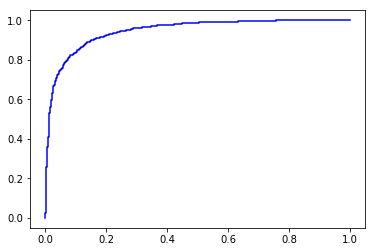

0.946044511448


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

logreg = LogisticRegression()
clf = logreg.fit(X_train, y_train)
predicted = clf.predict(X_test)
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted)

print(classification_report(y_test, predicted))

print("Accuracy:", accuracy_score(y_test, predicted))


from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr2,tpr2, color="blue")
plt.show()
print(metrics.auc(fpr2, tpr2))

In [103]:
X1 = X[0:20, :]
Y1 = Y[0:20, :]
City = df.as_matrix(columns=['City'])
C1 = City[0:20, :]

Y1_predicted = clf.predict(X1)
Y1_predicted = np.transpose([Y1_predicted])

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [142]:
X0_test = X_test[:, 0]
X0_test
X0_test.shape
Y_predicted = clf.predict_proba(X_test)[:,1]
Y_predicted
Y_predicted.shape

array([ 1.    ,  0.9199,  1.    , ...,  0.4615,  0.8684,  0.6667])

(2990,)

array([ 0.55162161,  0.33818082,  0.09752524, ...,  0.60181833,
        0.88524699,  0.08550021])

(2990,)

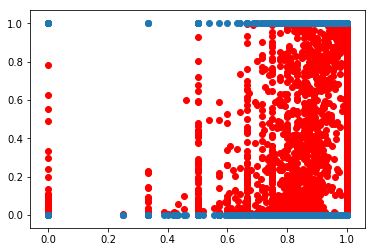

In [143]:
X0_test = X_test[:, 0]
Y_predicted = clf.predict_proba(X_test)[:,1]
plt.scatter(X0_test, Y_predicted, color="red")
plt.scatter(X0_test, y_test)
plt.show()

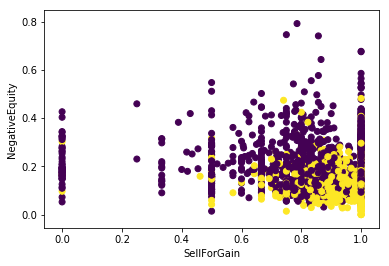

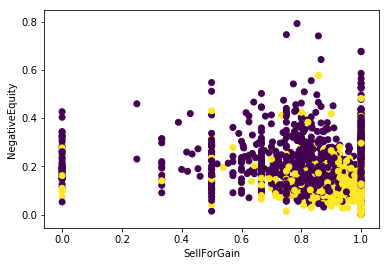

In [147]:
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 4],c=predicted)
plt.xlabel('SellForGain')
plt.ylabel('NegativeEquity')
plt.show()

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 4],c=y_test)
plt.xlabel('SellForGain')
plt.ylabel('NegativeEquity')
plt.show()

### 3.Naive Bayes

In [158]:
import pandas as pd

df = pd.read_csv("after_normalization_round.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 11 columns):
Index                   9964 non-null int64
City                    9964 non-null object
MarketHealthIndex       9964 non-null int64
SellForGain             9964 non-null float64
MoM                     9964 non-null float64
YoY                     9964 non-null float64
ForecastYoYPctChange    9964 non-null float64
NegativeEquity          9964 non-null float64
Delinquency             9964 non-null float64
DaysOnMarket            9964 non-null float64
Zri                     9964 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 817.4+ KB


In [159]:
df.head()

,Index,City,MarketHealthIndex,SellForGain,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,Zri
0,0,New York,8,0.9573,0.391177,0.516458,0.549638,0.116379,0.099894,0.491289,0.109584
1,1,Los Angeles,9,0.9637,0.429479,0.572632,0.594527,0.093381,0.031304,0.128920,0.143821
2,2,Chicago,1,0.8192,0.386944,0.462391,0.528597,0.392424,0.040973,0.306620,0.068041
3,3,Houston,7,0.8000,0.437753,0.532883,0.625732,0.162742,0.039081,0.222997,0.055721
4,4,Philadelphia,5,0.8760,0.432304,0.643848,0.638912,0.254035,0.074887,0.250871,0.042719


In [160]:
X = df.as_matrix(columns=['SellForGain','MoM','YoY','ForecastYoYPctChange','NegativeEquity','Delinquency','DaysOnMarket','Zri'])
Y = df.as_matrix(columns=['MarketHealthIndex'])
Y = Y.ravel()

In [161]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
clf = gnb.fit(X, Y)

#predict Hoboken
print(clf.predict([[0.8889, 0.39601617, 0.551712509, 0.557066754, 0.210198521, 0.00130719, 0.254355401, 0.069465082]]))
print(clf.predict_proba([[0.8889, 0.39601617, 0.551712509, 0.557066754, 0.210198521, 0.00130719, 0.254355401, 0.069465082]]))
print(clf.predict_log_proba([[0.8889, 0.39601617, 0.551712509, 0.557066754, 0.210198521, 0.00130719, 0.254355401, 0.069465082]]))

[6]
[[ 0.00085404  0.0150688   0.0499544   0.11306778  0.1629263   0.16432433
   0.21038718  0.11385174  0.13102791  0.0371152   0.00142233]]
[[-7.06552682 -4.19512915 -2.99664469 -2.17976781 -1.81445733 -1.8059132
  -1.55880575 -2.17285824 -2.03234495 -3.29372863 -6.5554569 ]]


In [163]:
X[0:20, :]
clf.predict(X[0:20, :])

array([[ 0.9573    ,  0.39117702,  0.51645755,  0.5496377 ,  0.11637862,
         0.09989406,  0.4912892 ,  0.10958395],
       [ 0.9637    ,  0.42947947,  0.57263232,  0.5945273 ,  0.09338128,
         0.03130356,  0.12891986,  0.1438212 ],
       [ 0.8192    ,  0.38694423,  0.46239147,  0.52859679,  0.39242389,
         0.04097297,  0.30662021,  0.06804111],
       [ 0.8       ,  0.43775345,  0.53288329,  0.62573194,  0.16274171,
         0.03908148,  0.22299652,  0.05572065],
       [ 0.876     ,  0.43230358,  0.64384804,  0.63891165,  0.25403485,
         0.07488651,  0.25087108,  0.04271917],
       [ 0.8821    ,  0.41979722,  0.58283237,  0.59096546,  0.19287174,
         0.0206925 ,  0.12195122,  0.04730064],
       [ 0.8194    ,  0.46432686,  0.70656858,  0.70440974,  0.27805238,
         0.06440179,  0.08362369,  0.04686726],
       [ 0.5       ,  0.43275087,  0.58301975,  0.57442129,  0.18103088,
         0.0398361 ,  0.14982578,  0.04593858],
       [ 0.9679    ,  0.43278063

array([ 2,  9,  1,  6,  6,  8,  8,  5,  9, 10,  7, 10,  7,  9, 10,  0,  8,
        6,  9,  1], dtype=int64)

             precision    recall  f1-score   support

          0       0.36      0.23      0.28       149
          1       0.31      0.29      0.30       298
          2       0.26      0.38      0.31       301
          3       0.26      0.28      0.27       300
          4       0.18      0.10      0.13       296
          5       0.19      0.09      0.12       300
          6       0.19      0.32      0.24       297
          7       0.16      0.03      0.05       302
          8       0.24      0.21      0.23       298
          9       0.33      0.65      0.43       300
         10       0.53      0.46      0.49       149

avg / total       0.26      0.27      0.25      2990

Accuracy:
0.269899665552


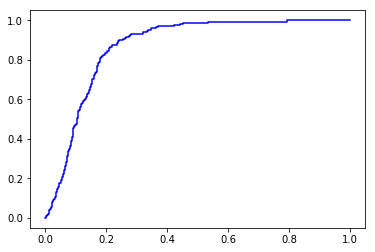

0.868758538847


In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)
predicted=clf.predict(X_test)
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted)
    
print(classification_report(y_test, predicted))

print("Accuracy:")
print(accuracy_score(y_test, predicted))


from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr2,tpr2, color="blue")
plt.show()
print(metrics.auc(fpr2, tpr2))

In [165]:
import pandas as pd

df = pd.read_csv("after_normalization_binary.csv")
df.head()

X = df.as_matrix(columns=['SellForGain','MoM','YoY','ForecastYoYPctChange','NegativeEquity','Delinquency','DaysOnMarket','Zri'])
Y = df.as_matrix(columns=['MarketHealthIndex'])
Y = Y.ravel()


from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
clf = gnb.fit(X, Y)

clf.predict(X[0:20, :])

,Index,City,MarketHealthIndex,SellForGain,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,Zri
0,0,New York,1,0.9573,0.391177,0.516458,0.549638,0.116379,0.099894,0.491289,0.109584
1,1,Los Angeles,1,0.9637,0.429479,0.572632,0.594527,0.093381,0.031304,0.128920,0.143821
2,2,Chicago,0,0.8192,0.386944,0.462391,0.528597,0.392424,0.040973,0.306620,0.068041
3,3,Houston,1,0.8000,0.437753,0.532883,0.625732,0.162742,0.039081,0.222997,0.055721
4,4,Philadelphia,0,0.8760,0.432304,0.643848,0.638912,0.254035,0.074887,0.250871,0.042719


array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

             precision    recall  f1-score   support

          0       0.87      0.81      0.84      1644
          1       0.79      0.85      0.82      1346

avg / total       0.83      0.83      0.83      2990

Accuracy:
0.829431438127


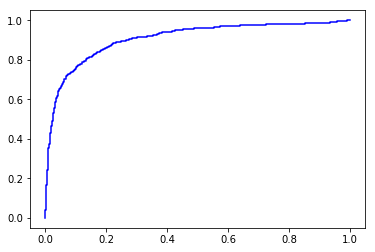

0.907101965633


In [166]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)
predicted=clf.predict(X_test)
precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted)
    
print(classification_report(y_test, predicted))

print("Accuracy:")
print(accuracy_score(y_test, predicted))


from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, gnb.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr2,tpr2, color="blue")
plt.show()
print(metrics.auc(fpr2, tpr2))

### 4.K-means clustering

In [206]:
import pandas as pd

df = pd.read_csv("after_normalization.csv")
df.head()

,Index,City,MarketHealthIndex,SellForGain,MoM,YoY,ForecastYoYPctChange,NegativeEquity,Delinquency,DaysOnMarket,Zri
0,0,New York,7.818005,0.9573,0.391177,0.516458,0.549638,0.116379,0.099894,0.491289,0.109584
1,1,Los Angeles,8.531387,0.9637,0.429479,0.572632,0.594527,0.093381,0.031304,0.128920,0.143821
2,2,Chicago,0.547932,0.8192,0.386944,0.462391,0.528597,0.392424,0.040973,0.306620,0.068041
3,3,Houston,7.166910,0.8000,0.437753,0.532883,0.625732,0.162742,0.039081,0.222997,0.055721
4,4,Philadelphia,4.831144,0.8760,0.432304,0.643848,0.638912,0.254035,0.074887,0.250871,0.042719


In [207]:
X = df.as_matrix(columns=['SellForGain','MoM','YoY','ForecastYoYPctChange','NegativeEquity','Delinquency','DaysOnMarket','Zri'])

from sklearn.cluster import KMeans

km = KMeans(n_clusters=11, n_init=10)
clusters = km.fit_predict(X)

colors = np.array([x for x in ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99']])
color = colors[clusters]

plt.figure(figsize=(25, 10))

#scatter plot
for x, y, c in zip(X[:, 0], X[:, 4], color):
    plt.scatter(x,y,color=c)


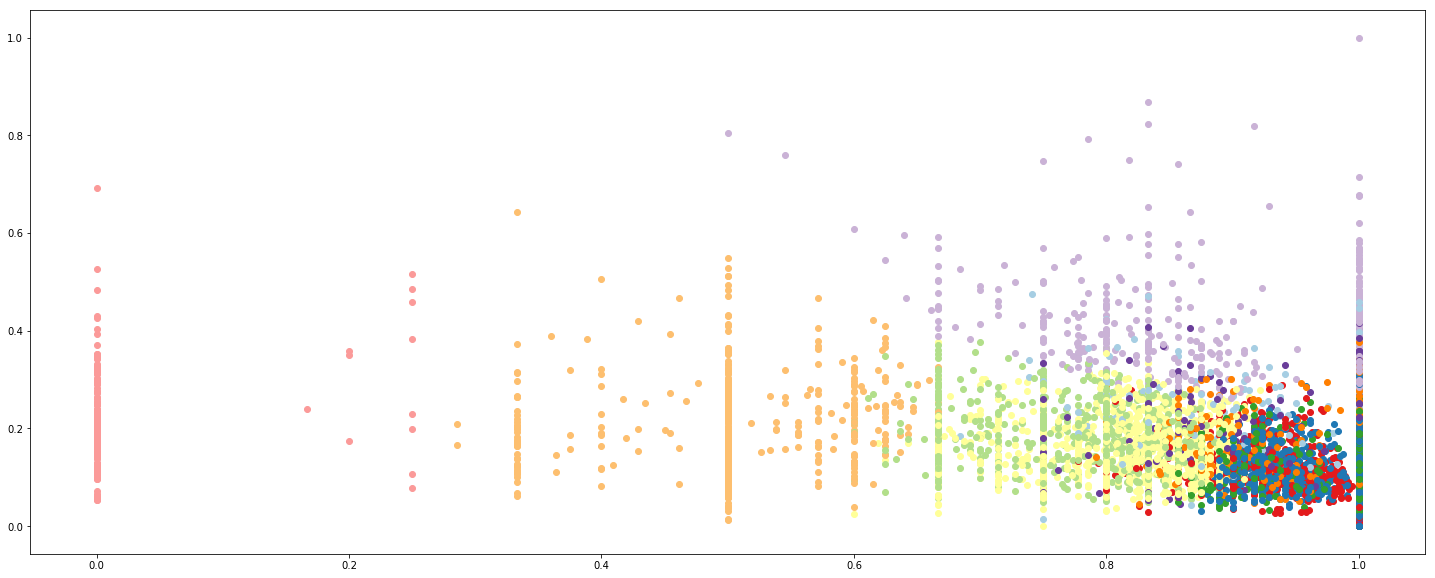

In [208]:
plt.show()

In [210]:
clst = km.fit(X)
clst = clst.labels_.tolist()

df1 = pd.read_csv("after_normalization_round.csv")
target = df1['MarketHealthIndex'].values
target = target.tolist()

data = pd.DataFrame(list(zip(target, clst)), columns=['actual_class','cluster'])
data.head(20)
pd.crosstab(index=data.cluster, columns=data.actual_class)

,actual_class,cluster
0,8,1
1,9,6
2,1,9
3,7,0
4,5,8
5,7,0
6,5,6
7,6,5
8,9,6
9,10,6


actual_class,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,
0,37,127,142,183,173,180,143,109,98,40,4
1,66,109,89,71,55,49,34,25,19,21,4
2,15,71,147,201,257,291,348,334,297,275,82
3,36,47,29,22,20,17,13,12,6,1,1
4,87,191,169,105,78,68,38,16,9,3,0
5,54,84,91,59,64,53,32,33,14,8,2
6,0,1,0,6,15,36,88,169,242,330,213
7,2,19,75,121,169,169,190,199,192,181,68
8,0,0,3,8,26,36,52,80,94,138,124


In [214]:
cluster_dict={0:8, 1:3, 2:6, 3:5, 4:2, 5:4, 6:9, 7:7, 8:10, 9:0, 10:1}

predicted_clusters=[cluster_dict[i] for i in clst]

print(metrics.classification_report(target, predicted_clusters))
print("Accuracy:", accuracy_score(target, predicted_clusters))

             precision    recall  f1-score   support

          0       0.14      0.14      0.14       496
          1       0.28      0.25      0.27       993
          2       0.22      0.17      0.19      1003
          3       0.13      0.07      0.09      1000
          4       0.13      0.06      0.09       987
          5       0.08      0.02      0.03      1001
          6       0.15      0.35      0.21       989
          7       0.14      0.20      0.17      1005
          8       0.08      0.10      0.09       993
          9       0.30      0.33      0.31       999
         10       0.22      0.25      0.23       498

avg / total       0.17      0.17      0.16      9964

Accuracy: 0.174327579285


In [ ]:
cluster_dict={0:6, 1:3, 2:7, 3:0, 4:2, 5:4, 6:9, 7:8, 8:10, 9:5, 10:1}